# Deep Learning Regression with Admissions Data

For this project, we will create a deep learning regression model that predicts the likelihood that a student applying to graduate school will be accepted based on various application factors (such as test scores).

By analyzing the parameters in this graduate admissions dataset, we will use TensorFlow with Keras to create a regression model that can evaluate the chances of an applicant being admitted. 

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow	import keras
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import Normalizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD


import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('admissions_data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Preprocessing

In [5]:
df = df.drop(['Serial No.'],axis =1)

In [6]:
features = df.iloc[:,0:-1]

In [7]:
labels = df.iloc[:,-1]

In [8]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.25,random_state=42)

In [9]:
ct = ColumnTransformer([('scale',StandardScaler(),features.columns)])

In [10]:
features_train_scaled =ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)


# Building The Model

In [11]:
model = Sequential()
input = layers.InputLayer(input_shape=(features.shape[1],))
model.add(input)
# model.add(layers.Dense(64,activation='relu'))
# model.add(layers.Dropout(0.1))
hidden_layer = layers.Dense(16, activation='relu')
model.add(hidden_layer)
model.add(layers.Dropout(0.1))
hidden_layer_2 = layers.Dense(8, activation='relu')
model.add(hidden_layer_2)
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))


model.add(layers.Dense(1))
opt = Adam(learning_rate=0.005)
stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)
model.compile(loss='mse',metrics=['mae'],optimizer=opt)

history = model.fit(features_train_scaled,labels_train,epochs=100,batch_size=8,verbose=1,validation_split=0.25,callbacks=[stop])

Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 0.2075 - mae: 0.3678 - val_loss: 0.0352 - val_mae: 0.1568
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0512 - mae: 0.1882 - val_loss: 0.0165 - val_mae: 0.1071
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0303 - mae: 0.1385 - val_loss: 0.0086 - val_mae: 0.0759
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0203 - mae: 0.1121 - val_loss: 0.0097 - val_mae: 0.0842
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0146 - mae: 0.0984 - val_loss: 0.0071 - val_mae: 0.0668
Epoch 6/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0129 - mae: 0.0900 - val_loss: 0.0068 - val_mae: 0.0661
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0854 - val_loss: 0.0060 - val_mae: 0.0577
Epoch 8/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0110 - m

In [12]:
val_mse,val_mae = model.evaluate(features_test_scaled,labels_test,verbose=0)
print(val_mse,val_mae)

0.004503170028328896 0.05276947841048241


tuning model (mse,mae) (0.007,0.0667) ---early_stoppint--> (0.00653,0.0654) --Dropout--->(0.00671,0.0597)---Optimizer=SGD-->(0.00559,0.0560)---epochs_increse--> (0.0055,0.054)---learning_desc-->(0.00509,0.0527)

In [15]:
predicted_value = model.predict(features_test_scaled)
print(r2_score(labels_test,predicted_value))

0.7693255473810561


Our Model is 77% Accurate which can be improved with more fine tuning Also by consider if there are any dataset features that should not be included as a predictor.

# Visualizing Error

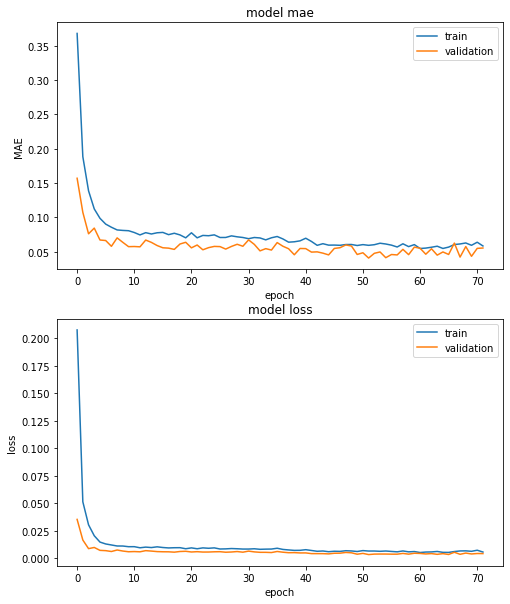

In [14]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper right')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper right')

plt.show()